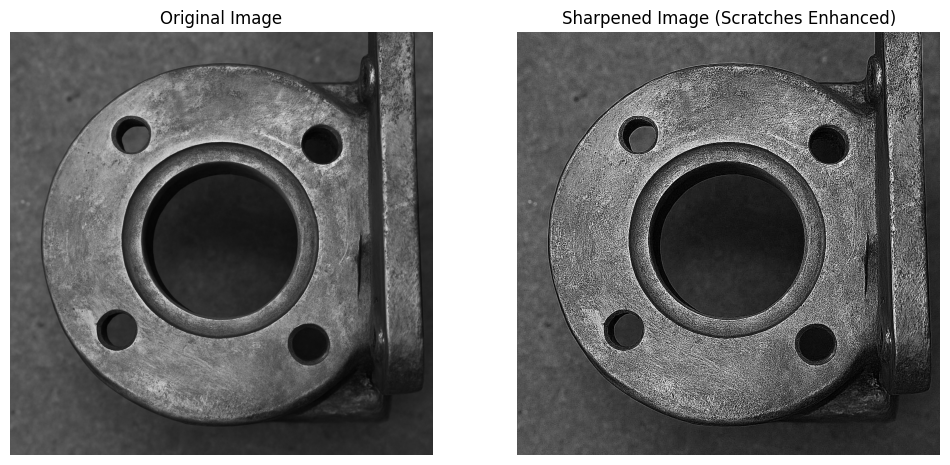

In [1]:
#spatial filtering to enhance the surface of an automotive part image and highlight scratches or dents. 

import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)
sharpening_kernel = np.array([[-1, -1, -1],
[-1,  9, -1],
[-1, -1, -1]])
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Sharpened Image (Scratches Enhanced)')
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')
plt.show()

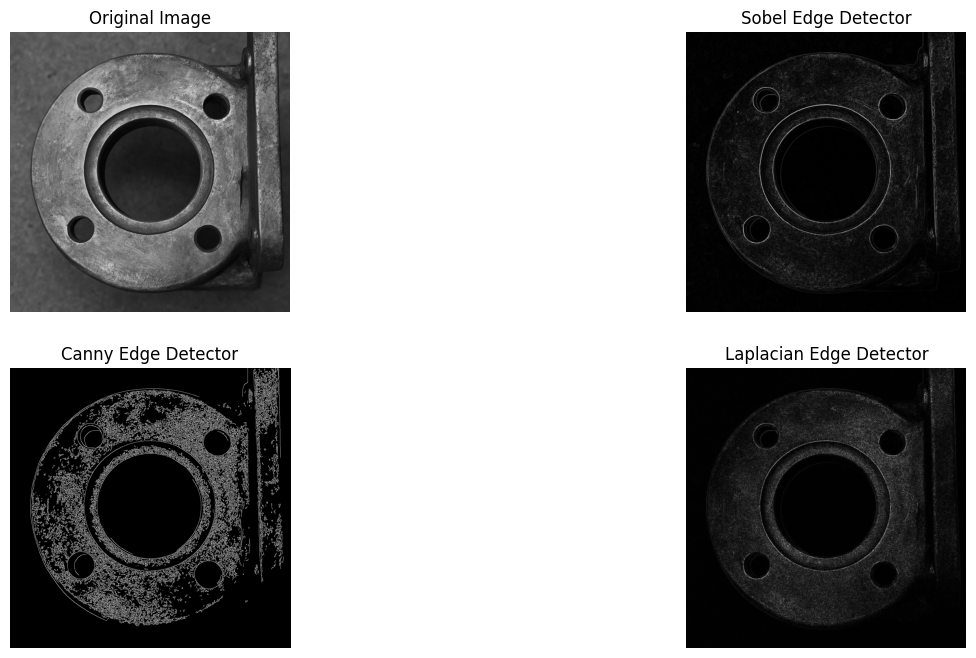

In [2]:
#Implement Sobel, Canny, and Laplacian edge detectors on bridge/concrete images to detect cracks. Compare their effectiveness

image = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

#  Sobel edge detector
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = cv2.magnitude(sobelx, sobely)

# Canny edge detector
canny_edges = cv2.Canny(image, 100, 200)

# Laplacian edge detector
laplacian_edges = cv2.Laplacian(image, cv2.CV_64F)
laplacian_edges = np.uint8(np.absolute(laplacian_edges))

plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Sobel Edge Detector')
plt.imshow(sobel_combined, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Canny Edge Detector')
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Laplacian Edge Detector')
plt.imshow(laplacian_edges, cmap='gray')
plt.axis('off')

plt.show()

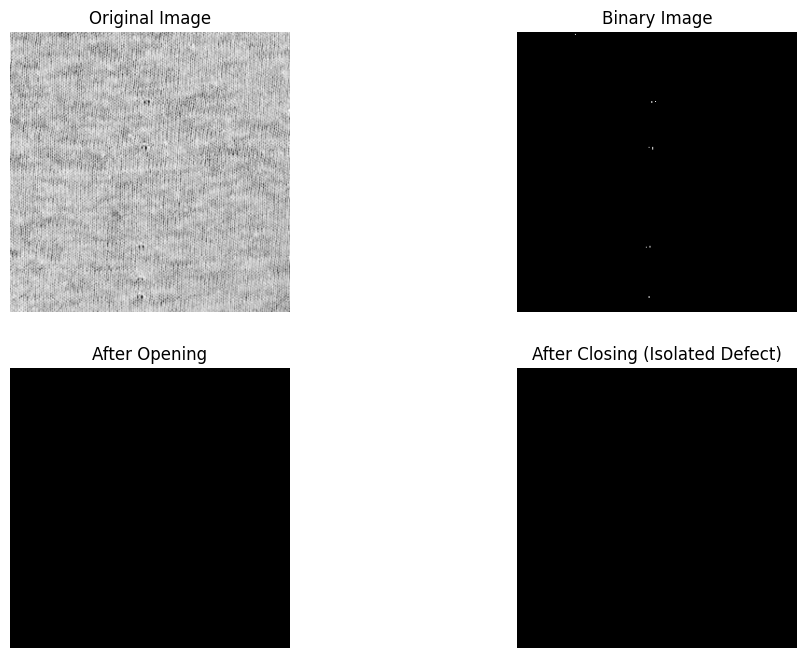

In [8]:
#Use morphological operations (opening/closing) to isolate defective regions in a fabric image

image = cv2.imread("fabric.jpg", cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('After Opening')
plt.imshow(opening, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('After Closing (Isolated Defect)')
plt.imshow(closing, cmap='gray')
plt.axis('off')

plt.show()

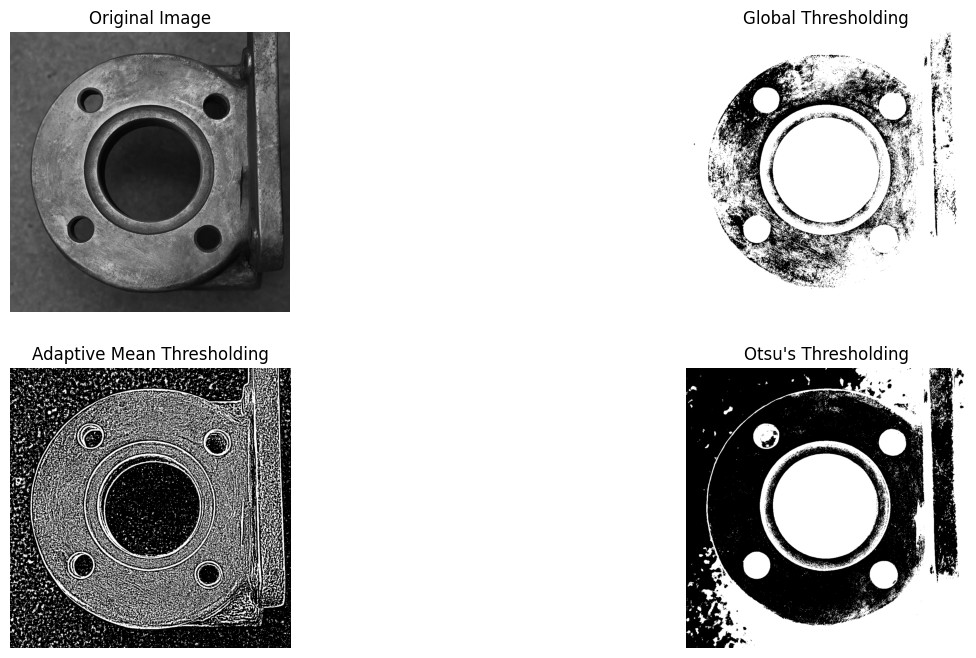

In [9]:
#Apply global, adaptive, and Otsu thresholding on metal surface images to separate defective vs. non-defective regions. Provide comparative results

image = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)
_, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
adaptive_thresh_mean = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                              cv2.THRESH_BINARY_INV, 11, 2)
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Global Thresholding')
plt.imshow(global_thresh, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Adaptive Mean Thresholding')
plt.imshow(adaptive_thresh_mean, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Otsu's Thresholding")
plt.imshow(otsu_thresh, cmap='gray')
plt.axis('off')

plt.show()


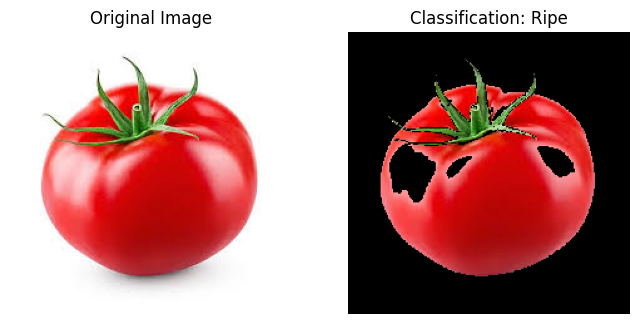

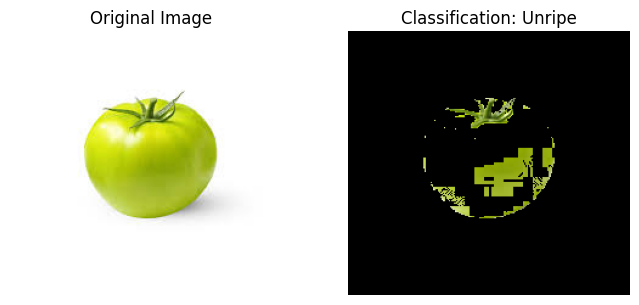

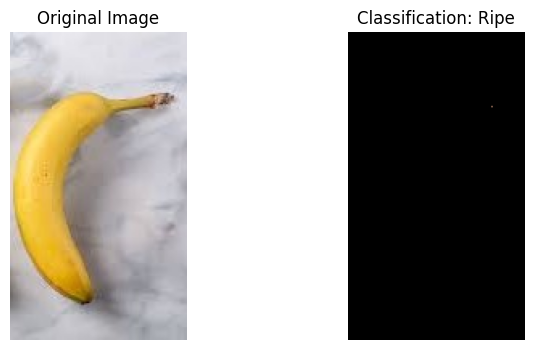

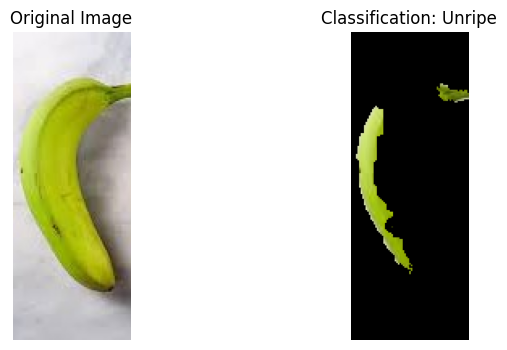

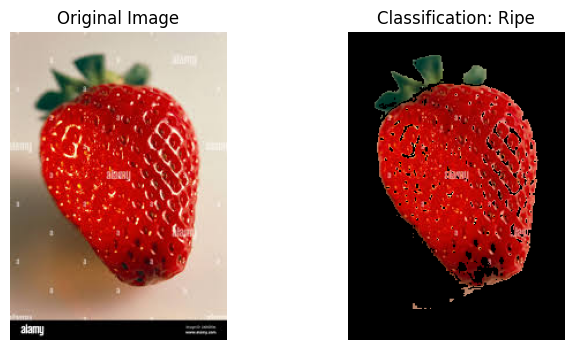

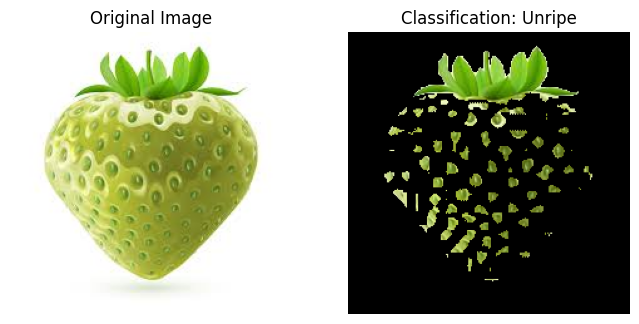

In [11]:
#Develop a color-based thresholding method (HSV space) to classify fruits as ripe or unripe

def classify_fruit_ripeness(image_path):
    try:
        image = cv2.imread(image_path)
        if image is None:
            raise FileNotFoundError
    except FileNotFoundError:
        print(f"Error: '{image_path}' not found.")
        return

    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_ripe1 = np.array([0, 100, 100])
    upper_ripe1 = np.array([10, 255, 255])
    lower_ripe2 = np.array([160, 100, 100])
    upper_ripe2 = np.array([180, 255, 255])

    lower_unripe = np.array([35, 50, 50])
    upper_unripe = np.array([85, 255, 255])

    ripe_mask1 = cv2.inRange(hsv_image, lower_ripe1, upper_ripe1)
    ripe_mask2 = cv2.inRange(hsv_image, lower_ripe2, upper_ripe2)
    ripe_mask = cv2.bitwise_or(ripe_mask1, ripe_mask2)

    unripe_mask = cv2.inRange(hsv_image, lower_unripe, upper_unripe)

    ripe_pixels = cv2.countNonZero(ripe_mask)
    unripe_pixels = cv2.countNonZero(unripe_mask)

    if ripe_pixels > unripe_pixels:
        classification = "Ripe"
    else:
        classification = "Unripe"

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    combined_mask = cv2.bitwise_or(ripe_mask, unripe_mask)
    result = cv2.bitwise_and(image, image, mask=combined_mask)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(f'Classification: {classification}')
    plt.axis('off')
    plt.show()

# Test on at least 5 samples (replace with your image paths)
# Download images of ripe and unripe fruits (e.g., tomatoes, bananas)
fruit_samples = [
    'ripe_tomato.jpeg',
    'unripe_tomato.jpeg',
    'ripe_banana.jpeg',
    'unripe_banana.jpeg',
    'ripe_strawberry.jpeg',
    'unripe_strawberry.jpeg'
]

for sample in fruit_samples:
    classify_fruit_ripeness(sample)

In [ ]:
#Use connected components analysis on a tablet image to detect missing, broken, or extra objects.

image = cv2.imread('tablet.jpeg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity=8)

output = image.copy()
min_area = 500  
max_area = 5000 
expected_tablets = 5

defects = []
detected_tablets = 0

for i in range(1, num_labels):
    x, y, w, h, area = stats[i]
    if min_area < area < max_area:
        detected_tablets += 1
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)
    elif area < min_area:
        defects.append((x, y, w, h))
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(output, "Broken?", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)


if detected_tablets < expected_tablets:
    print(f"Defect Detected: Missing {expected_tablets - detected_tablets} tablet(s).")

if detected_tablets > expected_tablets:
    print(f"Defect Detected: {detected_tablets - expected_tablets} extra object(s).")


for x, y, w, h in defects:
     print("Defect Detected: Potentially broken tablet.")


plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title('Defect Detection using Connected Components')
plt.axis('off')
plt.show()

Statistics:
  - Good Solder Joints: 12
  - Defective Solder Joints: 453


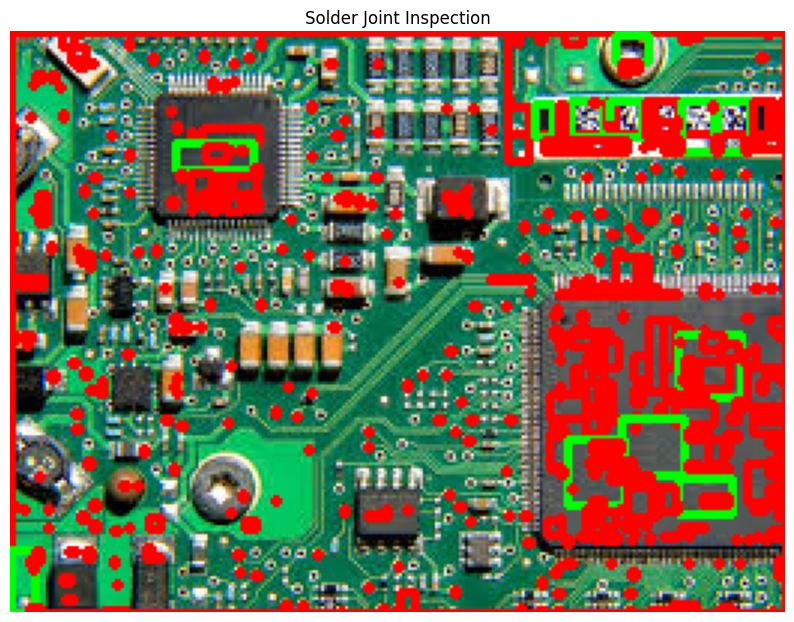

In [15]:
#Apply connected component labeling to count defective vs. good solder joints on PCB images. Provide statistics of the results

image = cv2.imread('pcb.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity=8)

output = image.copy()
good_joints = 0
defective_joints = 0
min_area = 50  
max_area = 300 

for i in range(1, num_labels):
    x, y, w, h, area = stats[i]
    if min_area < area < max_area:
        good_joints += 1
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)
    else:
        defective_joints += 1
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 0, 255), 2)

print(f"Statistics:")
print(f"  - Good Solder Joints: {good_joints}")
print(f"  - Defective Solder Joints: {defective_joints}")

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title('Solder Joint Inspection')
plt.axis('off')
plt.show()

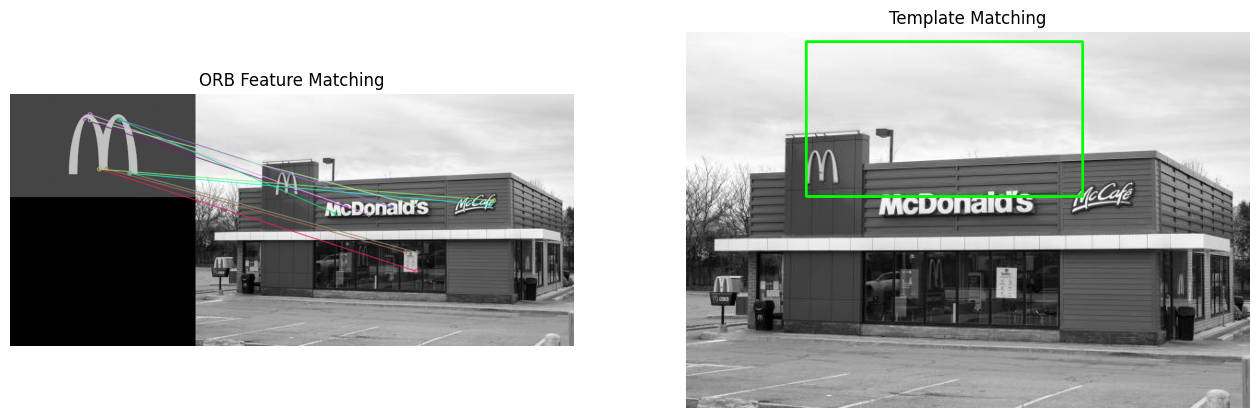

In [16]:
#Implement SIFT or ORB feature matching to detect brand logos/serial numbers in product images. Compare with template matching

img_scene = cv2.imread('mcdonalds_building.jpg', cv2.IMREAD_GRAYSCALE)
img_logo = cv2.imread('mcdonalds_logo.png', cv2.IMREAD_GRAYSCALE)
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img_logo, None)
kp2, des2 = orb.detectAndCompute(img_scene, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)
img_matches = cv2.drawMatches(img_logo, kp1, img_scene, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
w, h = img_logo.shape[::-1]
res = cv2.matchTemplate(img_scene, img_logo, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
img_template_match = cv2.cvtColor(img_scene.copy(), cv2.COLOR_GRAY2BGR)
cv2.rectangle(img_template_match, top_left, bottom_right, (0, 255, 0), 2)


plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_matches)
plt.title('ORB Feature Matching')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_template_match, cv2.COLOR_BGR2RGB))
plt.title('Template Matching')
plt.axis('off')

plt.show()

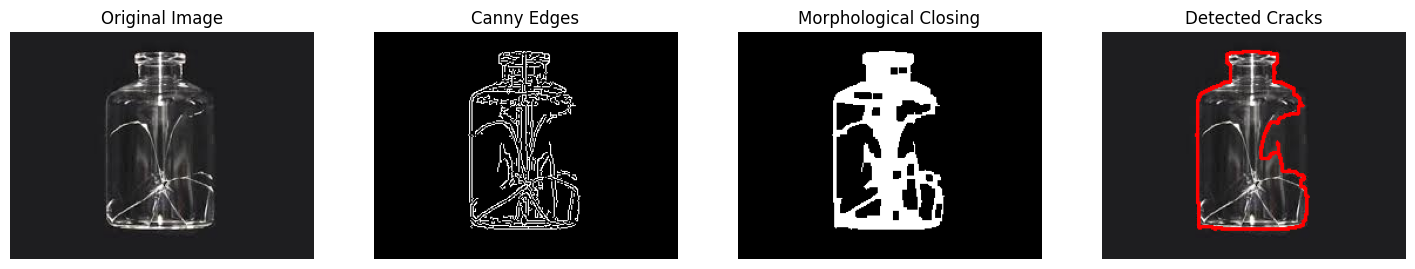

In [19]:
#Design a pipeline using edge detection + morphology to detect cracks or missing parts in glass bottle images. Show defect localization.

image = cv2.imread('glass_broke.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)

kernel = np.ones((5,5), np.uint8)
closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(closed_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

output = image.copy()
min_contour_area = 100 
for cnt in contours:
    if cv2.contourArea(cnt) > min_contour_area:
        cv2.drawContours(output, [cnt], -1, (0, 0, 255), 2)

plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Canny Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Morphological Closing')
plt.imshow(closed_edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Detected Cracks')
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

In [ ]:
#Perform defect detection on PCB images using edge detection and morphology to identify broken tracks or missing solder points. Provide annotated outputs.

template_img = cv2.imread('pcb.jpeg', cv2.IMREAD_GRAYSCALE)
test_img = cv2.imread('pcb_defect.jpeg', cv2.IMREAD_GRAYSCALE)
diff_img = cv2.absdiff(template_img, test_img)

_, thresh_diff = cv2.threshold(diff_img, 30, 255, cv2.THRESH_BINARY)

kernel = np.ones((3,3), np.uint8)
dilated_diff = cv2.dilate(thresh_diff, kernel, iterations=2)

contours, _ = cv2.findContours(dilated_diff, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

annotated_img = cv2.cvtColor(test_img, cv2.COLOR_GRAY2BGR)
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(annotated_img, (x, y), (x + w, y + h), (0, 0, 255), 2)

plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1)
plt.title('Template PCB')
plt.imshow(template_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Defective PCB')
plt.imshow(test_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Difference Image')
plt.imshow(dilated_diff, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Annotated Defects')
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()